# Time series analysis using ARIMA

### Time series analysis


Time series analysis is a statistical technique that is used to analyze and interpret data that varies over time. In time series analysis, data is collected at regular intervals and is plotted on a graph to display how the values change over time. This type of analysis is commonly used in a wide range of fields, including economics, finance, engineering, social sciences, and many others.



### Goal of Time series analysis

The main goal of time series analysis is to identify patterns or trends in the data, as well as any underlying factors that may be contributing to these patterns. Some of the most common techniques used in time series analysis include trend analysis, seasonality analysis, autocorrelation analysis, forecasting, and smoothing.

### Use case of Time series analysis

Time series analysis is widely used in many different applications, including predicting stock prices, forecasting weather patterns, predicting traffic patterns, analyzing customer behavior, and many others. By analyzing data over time, time series analysis can provide valuable insights that can be used to make informed decisions and improve business outcomes.

### Important Terms of Time Series Analysis

__Time series:__ A time series is a set of observations collected at regular intervals over time.

__Time interval:__ The time interval refers to the length of time between each observation in the time series.

__Seasonality:__ Seasonality refers to the recurring patterns or cycles that occur at fixed intervals, such as daily, weekly, monthly, or yearly.

__Trend:__ The trend component refers to the long-term changes or patterns in the data. Trends can be upward, downward, or flat, and may be linear or nonlinear.

__Stationarity:__ A time series is stationary if its statistical properties, such as the mean and variance, remain constant over time. Stationarity is an important assumption in many time series analysis techniques.

__Autocorrelation:__ Autocorrelation refers to the degree to which the values of the time series are correlated with their past values. Autocorrelation is an important concept in many time series analysis techniques.

__White noise:__ White noise refers to a series of random values with a mean of zero and constant variance.

__Forecasting:__ Forecasting involves using the time series data and statistical models to make predictions about future values of the time series.

__Smoothing:__ Smoothing involves removing noise or random fluctuations from the time series data to reveal underlying trends or patterns.

__Residuals:__ Residuals are the differences between the observed values of the time series and the values predicted by a statistical model.

### Libraries in Python for time series analysis

__Pandas:__ Pandas is a powerful data manipulation library that provides flexible and efficient data structures for working with time series data. It offers a wide range of functions for time series data manipulation and analysis, including date range generation, time zone handling, and resampling.

__NumPy:__ NumPy is a fundamental library for scientific computing in Python. It provides efficient and fast numerical operations on arrays, which are often used in time series analysis.

__Matplotlib:__ Matplotlib is a plotting library for Python that is commonly used for visualizing time series data. It provides a wide range of tools for creating static, animated, and interactive plots.

__Seaborn:__ Seaborn is a visualization library for Python that provides a high-level interface for creating statistical graphics. It is particularly useful for creating complex visualizations of time series data.

__Statsmodels:__ Statsmodels is a Python library for statistical modeling and analysis. It provides a wide range of tools for time series analysis, including autoregressive integrated moving average (ARIMA) models, vector autoregression (VAR) models, and state space models.

__Scikit-learn:__ Scikit-learn is a Python library for machine learning. It provides a wide range of tools for time series forecasting, including regression models, decision trees, and support vector machines (SVMs).

__Prophet:__ Prophet is a forecasting library developed by Facebook that is specifically designed for time series analysis. It provides a flexible and intuitive interface for fitting time series models and making predictions.

### Data Source

Yahoo Finance is a popular source of financial market data, including historical stock prices and other financial time series data that can be used for time series analysis. For this project

In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
# from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima.model import ARIMA


In [3]:
import yfinance as yf

# Download historical daily stock prices for Apple Inc. (AAPL) from 2016-01-01 to 2022-03-11
data = yf.download('AAPL', start='2016-01-01', end='2022-03-11')

# Print the first few rows of the data
print(data.head())


[*********************100%***********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2016-01-04  25.652500  26.342501  25.500000  26.337500  24.074736  270597600
2016-01-05  26.437500  26.462500  25.602501  25.677500  23.471439  223164000
2016-01-06  25.139999  25.592501  24.967501  25.174999  23.012117  273829600
2016-01-07  24.670000  25.032499  24.107500  24.112499  22.040894  324377600
2016-01-08  24.637501  24.777500  24.190001  24.240000  22.157440  283192000


In [4]:
df=pd.DataFrame(data)

In [5]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,25.652500,26.342501,25.500000,26.337500,24.074736,270597600
2016-01-05,26.437500,26.462500,25.602501,25.677500,23.471439,223164000
2016-01-06,25.139999,25.592501,24.967501,25.174999,23.012117,273829600
2016-01-07,24.670000,25.032499,24.107500,24.112499,22.040894,324377600
2016-01-08,24.637501,24.777500,24.190001,24.240000,22.157440,283192000


In [6]:
df.shape

(1558, 6)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1558 entries, 2016-01-04 to 2022-03-10
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1558 non-null   float64
 1   High       1558 non-null   float64
 2   Low        1558 non-null   float64
 3   Close      1558 non-null   float64
 4   Adj Close  1558 non-null   float64
 5   Volume     1558 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 85.2 KB


### Visualization

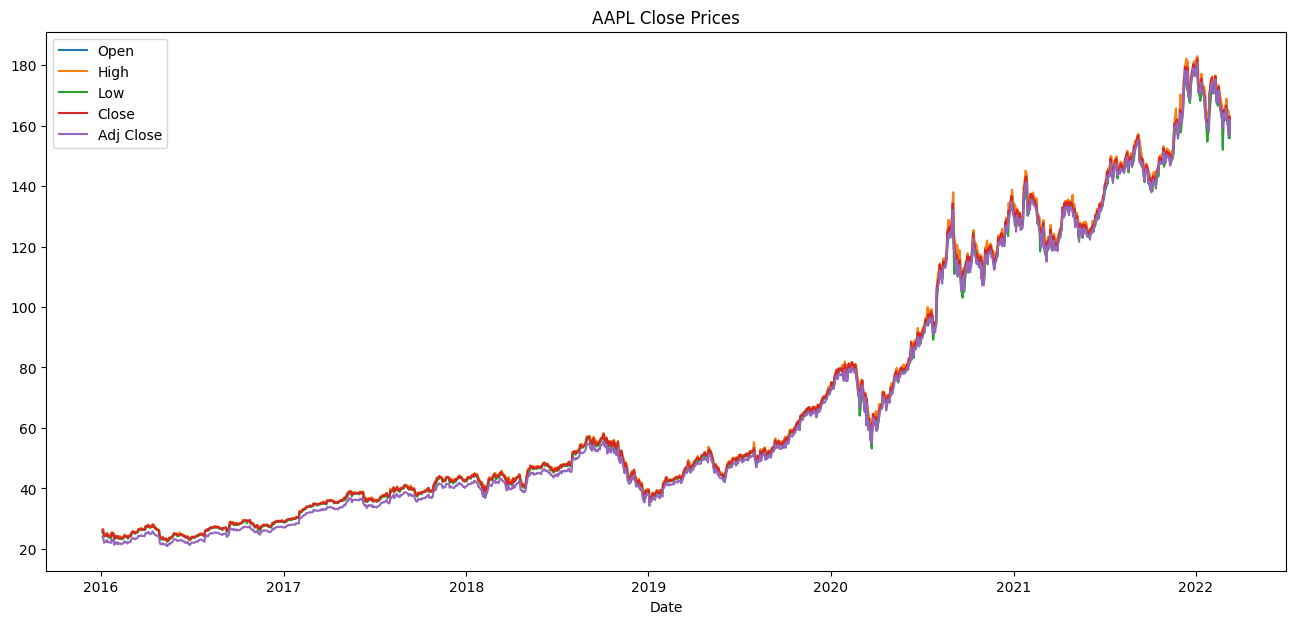

In [8]:
# Create a new figure and axis
plt.subplots(figsize=(16, 7))

# Create line plot 
plt.plot(df.index, df['Open'], label='Open')
plt.plot(df.index, df['High'], label='High')
plt.plot(df.index, df['Low'], label='Low')
plt.plot(df.index, df['Close'], label='Close')
plt.plot(df.index, df['Adj Close'], label='Adj Close')
# plt.plot(df.index, df['Volume'], label='Volume')

# set the plot title and axis labels
plt.title('AAPL Close Prices')
plt.xlabel('Date')
# plt.ylabel('Price')
plt.legend()
plt.show()


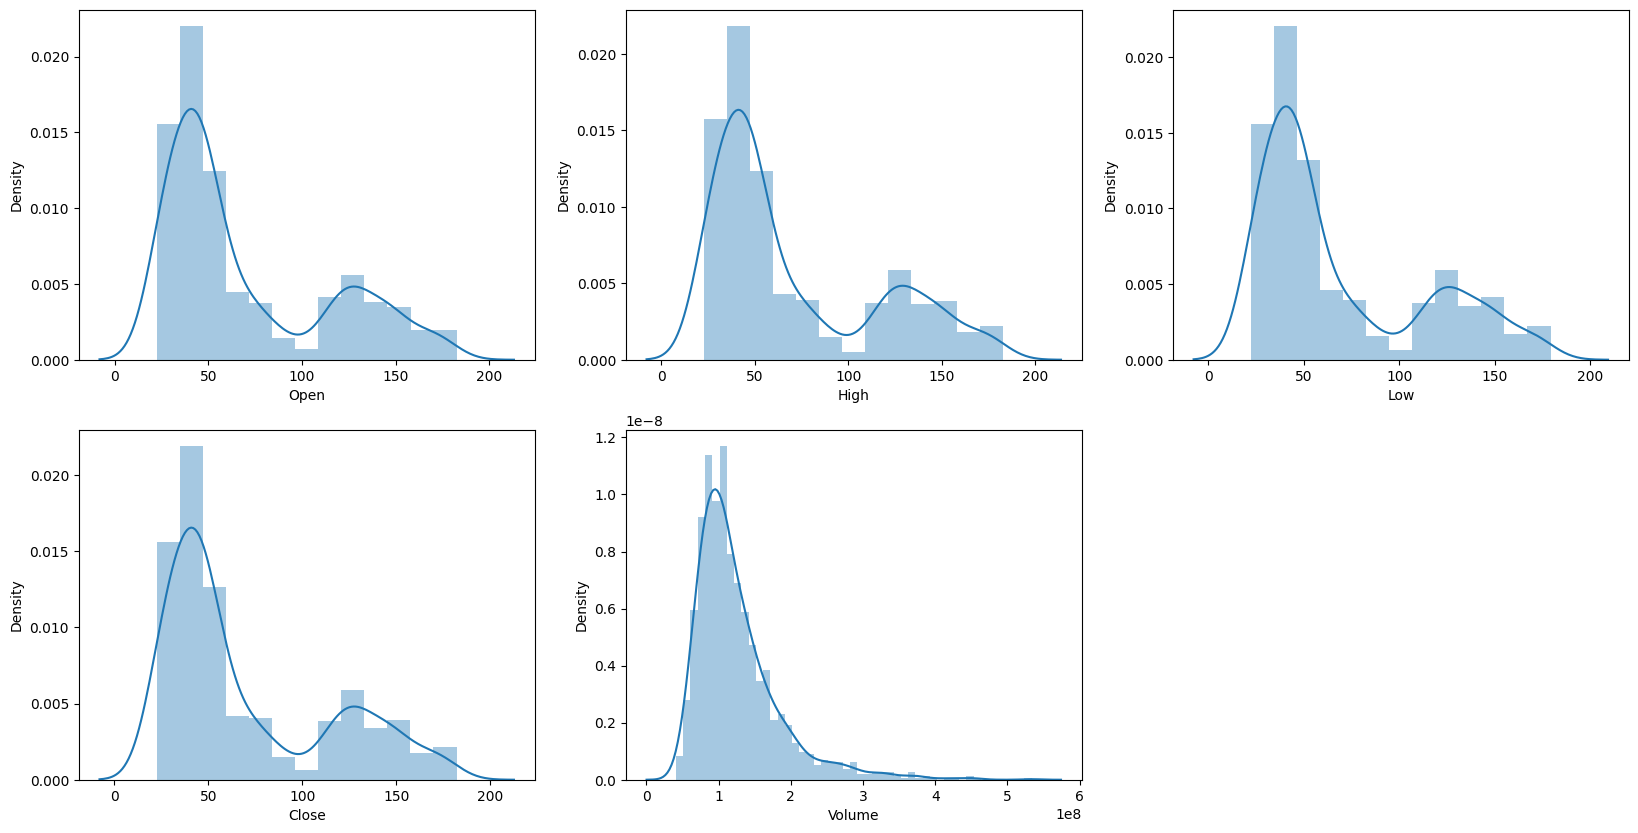

In [9]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']
plt.subplots(figsize=(20,10))
 
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sns.distplot(df[col])
plt.show()

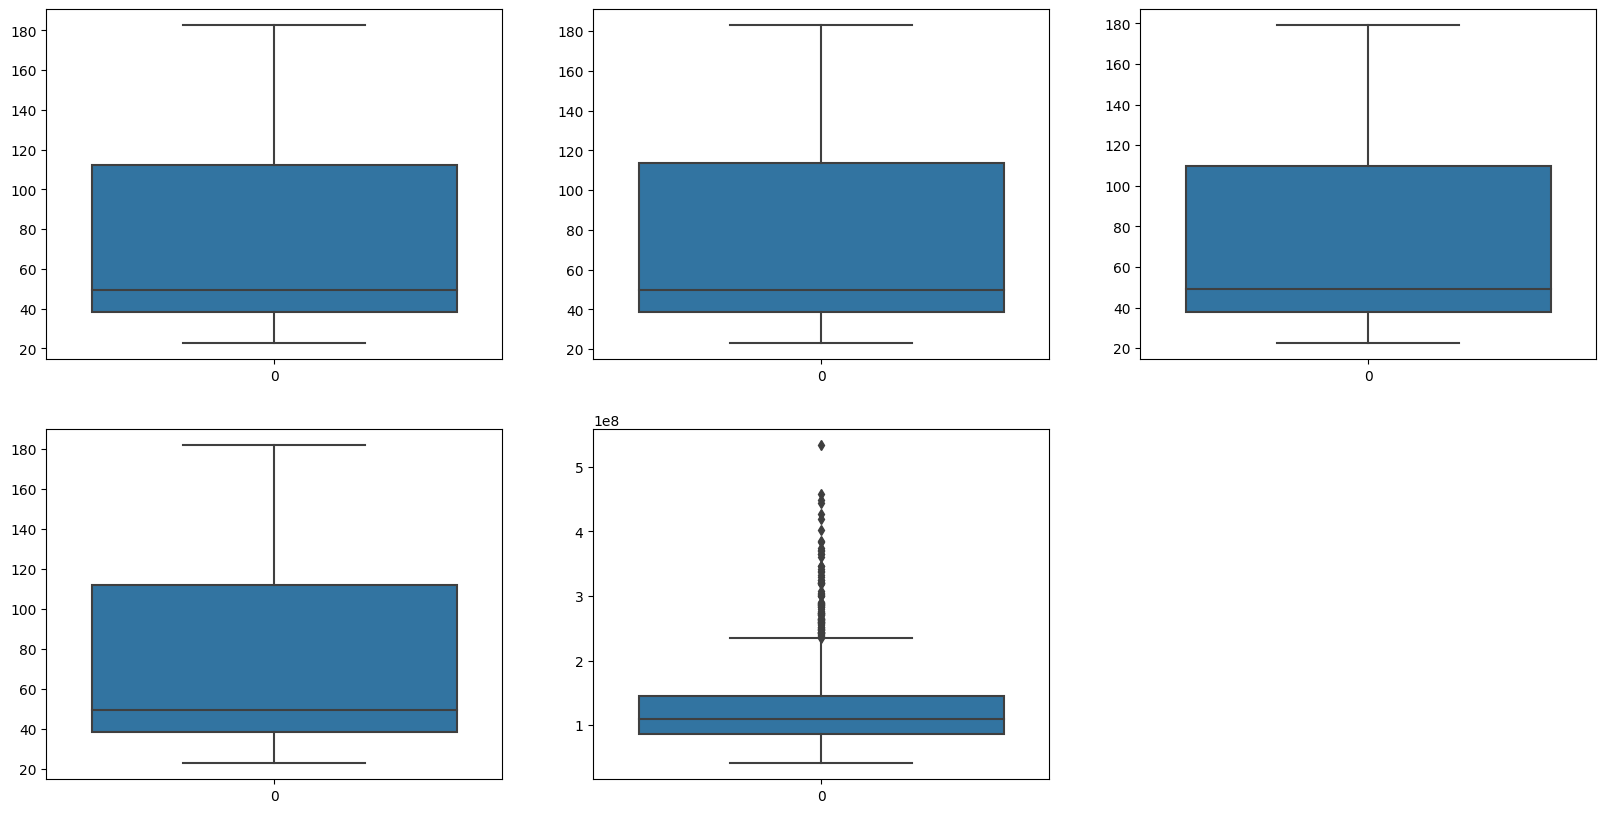

In [10]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']

plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sns.boxplot(df[col])
plt.show()

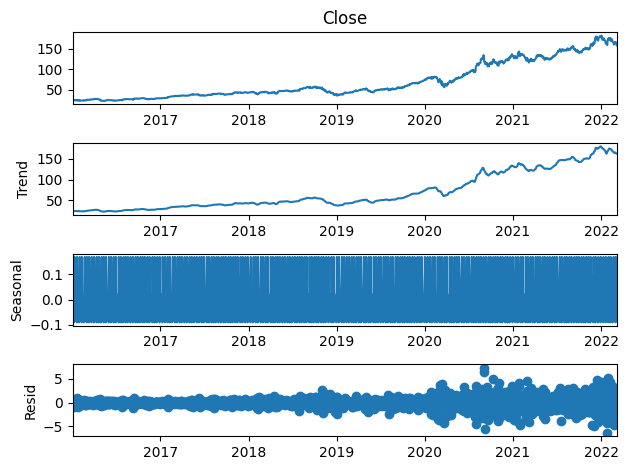

In [11]:
decompose = seasonal_decompose(df['Close'],model='additive', period=7)
decompose.plot()
plt.show()

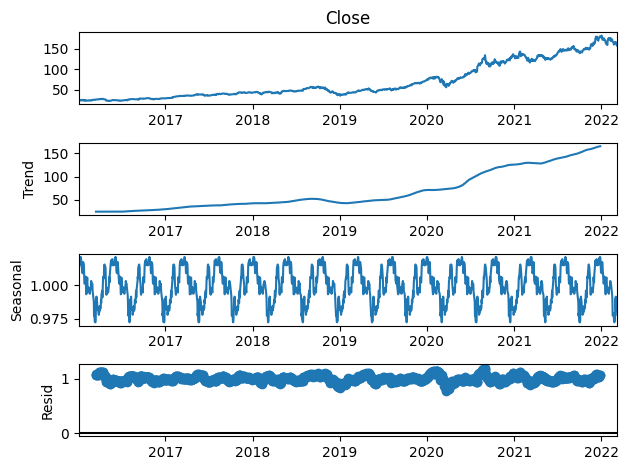

In [12]:
# Plot the seasonality graph of the aapl data set
decompose = seasonal_decompose(df['Close'],model='multiplicative', period=100)
decompose.plot()
plt.show()

In [13]:
def test_stationarity(df):
    
    # Determine rolling statistics
    rolling_mean = df['Close'].rolling(window=12).mean()
    rolling_std = df['Close'].rolling(window=12).std()
    
    # Ploting rolling statistics
    plt.subplots(figsize=(16, 7))
    plt.plot(df['Close'], color='blue',label='Original')
    plt.plot(rolling_mean, color='red', label='Rolling Mean')
    plt.plot(rolling_std, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Perform Dickey-Fuller test
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(df.iloc[:,0], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

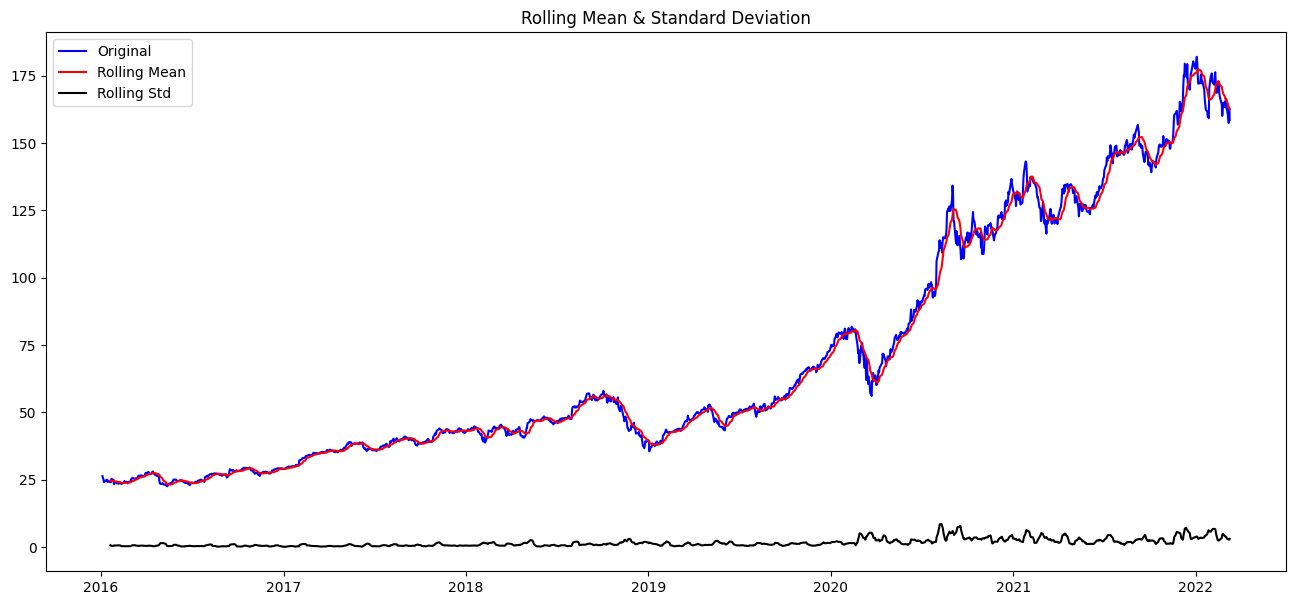

Results of Dickey-Fuller Test:
Test Statistic                    0.591906
p-value                           0.987414
#Lags Used                        6.000000
Number of Observations Used    1551.000000
Critical Value (1%)              -3.434573
Critical Value (5%)              -2.863405
Critical Value (10%)             -2.567763
dtype: float64


In [14]:
test_stationarity(df)

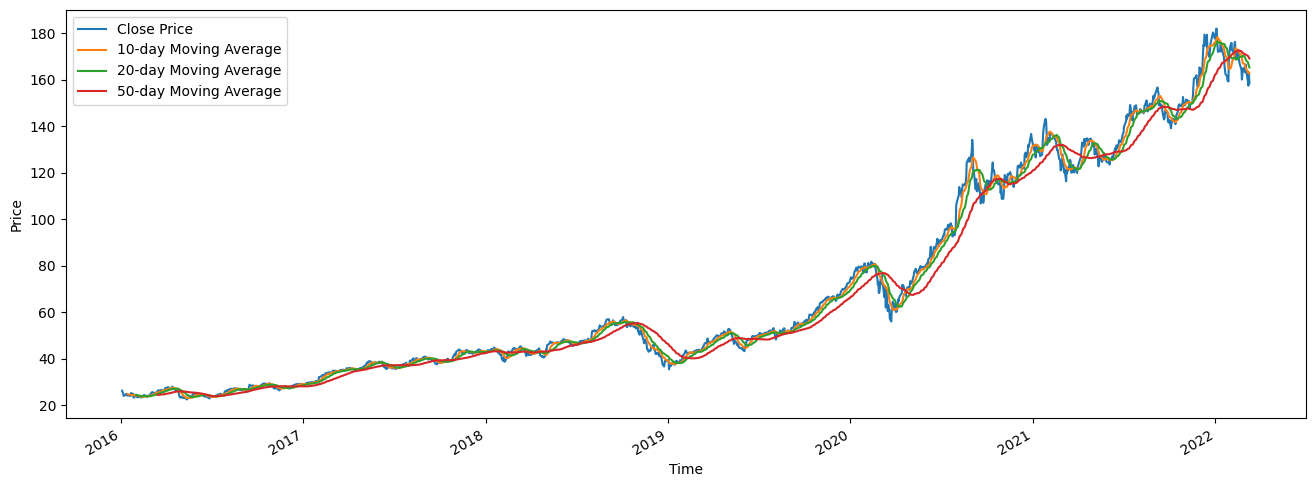

In [15]:
# Calculating Moving Average

# Calculate the 30-day moving average
df['10-day MA'] = df['Close'].rolling(window=10).mean()
df['20-day MA'] = df['Close'].rolling(window=20).mean()
df['50-day MA'] = df['Close'].rolling(window=50).mean()

plt.figure(figsize=(16,6))
df['Close'].plot(label='Close Price')
df['10-day MA'].plot(label='10-day Moving Average')
df['20-day MA'].plot(label='20-day Moving Average')
df['50-day MA'].plot(label='50-day Moving Average')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(loc='best')
plt.show()

In [18]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


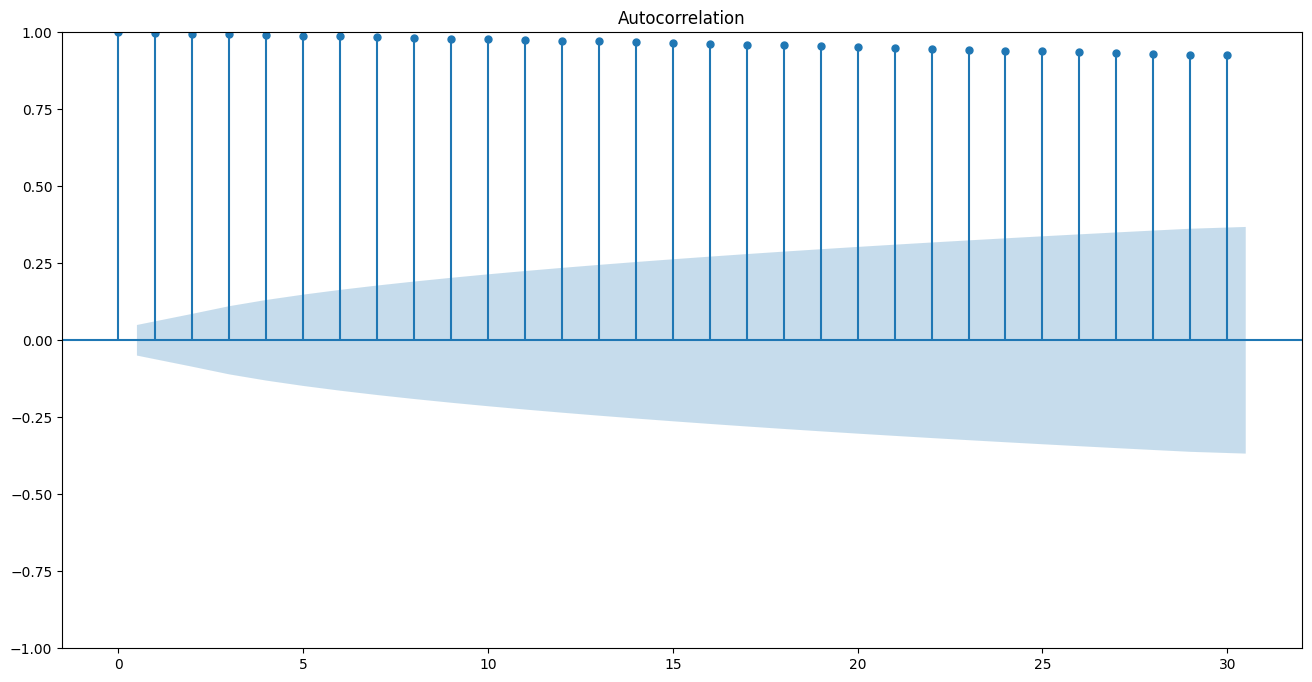

In [20]:
# ACF
fig,  ax = plt.subplots(figsize=(16,8))

# Plot the autocorrelation graph
plot_acf(df['Close'],ax=ax, lags=30)

# Show the plot
plt.show()

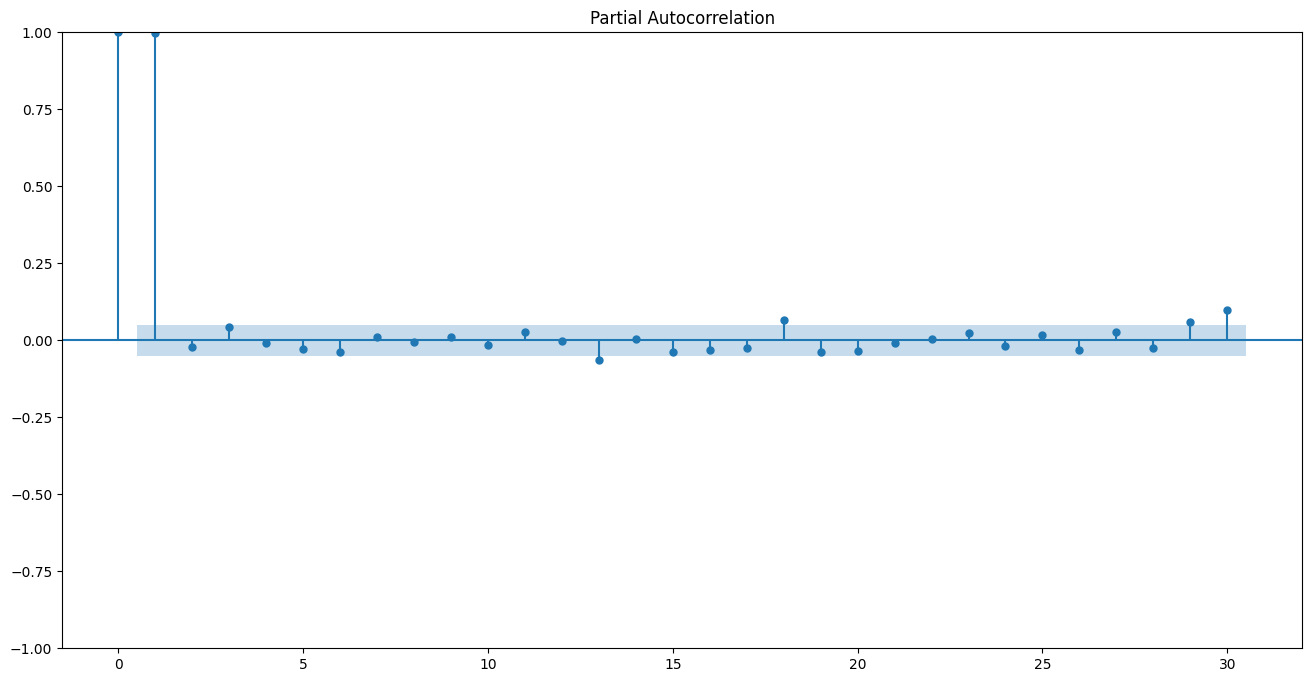

In [94]:
# PACF
# Plot the partial autocorrelation function for the "Close" price
fig,  ax = plt.subplots(figsize=(16,8))

plot_pacf(df['Close'],ax=ax, lags=30)
plt.show()

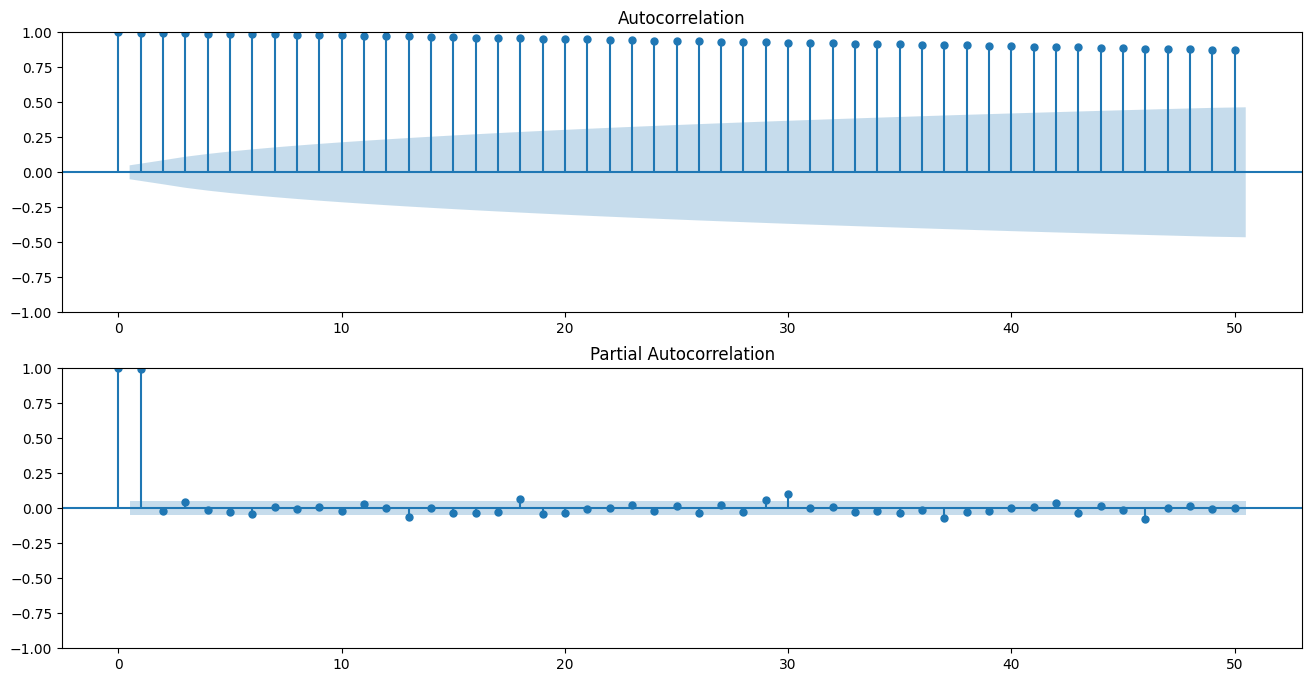

In [89]:
# Plot the ACF and PACF
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(16,8))
plot_acf(df["Close"], ax=ax1, lags=50)
plot_pacf(df["Close"], ax=ax2, lags=50)
plt.show()


### ARIMA

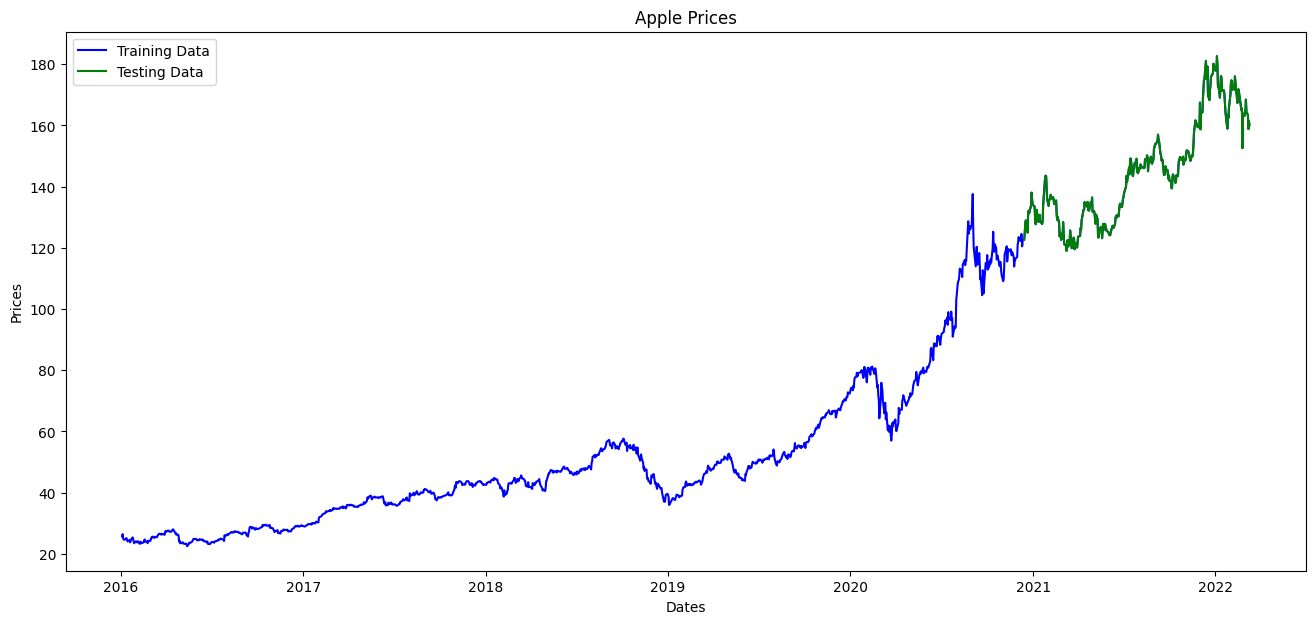

In [29]:
train_data, test_data = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]
plt.figure(figsize=(16,7))
plt.title('Apple Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(df['Open'], 'blue', label='Training Data')
plt.plot(test_data['Open'], 'green', label='Testing Data')
# plt.xticks(np.arange(0,1857, 300), df['Date'][0:1857:300])
plt.legend()

Thank You